In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from matplotlib import colors
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style("white")
sns.set_context("paper")
#%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[22.26] -2.015000000000015
[0.91650407] 0.4009756097560988
[24.28794465]


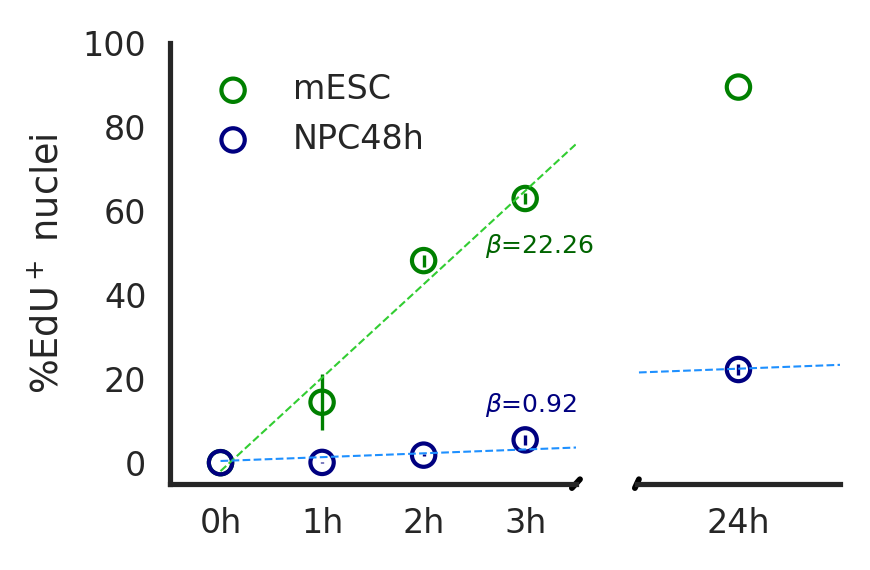

In [2]:
### DATA ###

mESC_1h = [21.1, 7.7]
mESC_2h = [49.6, 46.7]
mESC_3h = [64.3, 61.6]
mESC_15h = [89.0, 91.5]
mESC_24h = [89.5, 89.5]

NPC48h_1h = [0.0, 0.1, 0.1]
NPC48h_2h = [1.8, 1.5, 2.1]
NPC48h_3h = [4.8, 7.0, 4.5]
NPC48h_24h = [23.4, 21.0]



### PLOT ###

fig,(ax1,ax2) = plt.subplots(1,2,dpi=300, figsize=(3,2),sharey=True, gridspec_kw = {'width_ratios':[2, 1]})

ax1.scatter([0,1,2,3,24], [0,np.mean(mESC_1h),np.mean(mESC_2h),np.mean(mESC_3h),np.mean(mESC_24h)], edgecolor="green",facecolor="None", label="mESC", linewidth=1)
ax2.scatter([0,1,2,3,24], [0,np.mean(mESC_1h),np.mean(mESC_2h),np.mean(mESC_3h),np.mean(mESC_24h)], edgecolor="green",facecolor="None", label="mESC", linewidth=1)
ax1.errorbar(x = [0,1,2,3,24], y = [0,np.mean(mESC_1h),np.mean(mESC_2h),np.mean(mESC_3h),np.mean(mESC_24h)], yerr = [0,np.std(mESC_1h),np.std(mESC_2h),np.std(mESC_3h),np.std(mESC_24h)], fmt='none',color="green", linewidth=0.8)
ax2.errorbar(x = [0,1,2,3,24], y = [0,np.mean(mESC_1h),np.mean(mESC_2h),np.mean(mESC_3h),np.mean(mESC_24h)], yerr = [0,np.std(mESC_1h),np.std(mESC_2h),np.std(mESC_3h),np.std(mESC_24h)], fmt='none',color="green", linewidth=0.8)


ax1.scatter([0,1,2,3,24], [0,np.mean(NPC48h_1h),np.mean(NPC48h_2h),np.mean(NPC48h_3h),np.mean(NPC48h_24h)], edgecolor="navy",facecolor="None", label="NPC48h", linewidth=1)
ax2.scatter([0,1,2,3,24], [0,np.mean(NPC48h_1h),np.mean(NPC48h_2h),np.mean(NPC48h_3h),np.mean(NPC48h_24h)], edgecolor="navy",facecolor="None", label="NPC48h", linewidth=1)
ax1.errorbar(x = [0,1,2,3,24], y = [0,np.mean(NPC48h_1h),np.mean(NPC48h_2h),np.mean(NPC48h_3h),np.mean(NPC48h_24h)], yerr = [0,np.std(NPC48h_1h),np.std(NPC48h_2h),np.std(NPC48h_3h),np.std(NPC48h_24h)],fmt='none', color="navy", linewidth=0.8)
ax2.errorbar(x = [0,1,2,3,24], y = [0,np.mean(NPC48h_1h),np.mean(NPC48h_2h),np.mean(NPC48h_3h),np.mean(NPC48h_24h)], yerr = [0,np.std(NPC48h_1h),np.std(NPC48h_2h),np.std(NPC48h_3h),np.std(NPC48h_24h)],fmt='none', color="navy", linewidth=0.8)

ax1.set_xlim(-0.5,3.5)
ax2.set_xlim(23,25)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
# ax1.tick_params(labelright='off')
ax2.yaxis.tick_right()


ax1.set_ylim((-5,100))
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(["0h","1h","2h","3h"])
ax2.set_xticks([24])
ax2.set_xticklabels(["24h"])


ax1.legend()
ax1.set_ylabel("%EdU$^+$ nuclei")


d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
# ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)


lm_mESC = LinearRegression().fit(X=np.array([0,1,2,3]).reshape(-1,1),y=np.array([0,np.mean(mESC_1h),np.mean(mESC_2h),np.mean(mESC_3h)]))
ax1.plot(range(5), range(5)*lm_mESC.coef_+lm_mESC.intercept_, color='limegreen', linewidth=0.5, linestyle='--')
ax1.annotate(r'$\beta$={}'.format(round(lm_mESC.coef_[0],2)),(2.6,50),rotation=0,size=6,color='darkgreen')
print(lm_mESC.coef_, lm_mESC.intercept_)

lm_NPC = LinearRegression().fit(X=np.array([0,1,2,3,24]).reshape(-1,1),y=np.array([0,np.mean(NPC48h_1h),np.mean(NPC48h_2h),np.mean(NPC48h_3h),np.mean(NPC48h_24h)]))
ax1.plot(range(5), range(5)*lm_NPC.coef_+lm_NPC.intercept_, color='dodgerblue', linewidth=0.5, linestyle='--')
ax2.plot(range(26), range(26)*lm_NPC.coef_+lm_NPC.intercept_, color='dodgerblue', linewidth=0.5, linestyle='--')
ax1.annotate(r'$\beta$={}'.format(round(lm_NPC.coef_[0],2)),(2.6,12),rotation=0,size=6, color='navy')


print(lm_NPC.coef_, lm_NPC.intercept_)

print(lm_mESC.coef_ / lm_NPC.coef_)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig("../FIGURES/Proliferation_essay_lm.png")